## **Identitas Kelompok 2** ##

1. Ahmad Mafaza Afnani
2. Grace Wahyuni

# **Import Library** ##

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing  import StandardScaler, MinMaxScaler, OrdinalEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# **About Dataset** ## 

Dataset ini merupakan bagian dari World Weather Dataset yang telah kami perkecil dengan hanya mengambil daerah yang ada di Asia. 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/SenyuminAja16/machineLearningPemula/refs/heads/master/Data/GlobalWeatherRepository.csv')
df

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.400,26.600,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.3300,19.8200,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.100,2.000,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.7600,3.0500,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.400,18.400,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.5000,1.5200,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.700,0.900,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.8400,13.2300,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.400,262.300,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55537,Venezuela,Caracas,10.5000,-66.9167,America/Caracas,1740564000,2025-02-26 06:00,25.1,77.2,Clear,...,17.390,23.125,2,2,06:43 AM,06:37 PM,05:36 AM,05:33 PM,Waning Crescent,5
55538,Vietnam,Hanoi,21.0333,105.8500,Asia/Bangkok,1740564000,2025-02-26 17:00,17.2,63.0,Overcast,...,97.865,98.605,4,10,06:19 AM,06:00 PM,05:00 AM,04:17 PM,Waning Crescent,7
55539,Yemen,Sanaa,15.3547,44.2067,Asia/Aden,1740564000,2025-02-26 13:00,23.2,73.8,Sunny,...,27.380,91.020,2,3,06:22 AM,06:10 PM,05:04 AM,04:43 PM,Waning Crescent,6
55540,Zambia,Lusaka,-15.4167,28.2833,Africa/Lusaka,1740564000,2025-02-26 12:00,24.4,75.8,Light rain shower,...,9.435,10.915,1,1,06:07 AM,06:32 PM,04:20 AM,05:33 PM,Waning Crescent,6


In [3]:
df_asia = df[df["timezone"].str.contains("Asia", na=False)]

# **Dataset Exploration** 

In [4]:
df_asia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13650 entries, 0 to 55539
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       13650 non-null  object 
 1   location_name                 13650 non-null  object 
 2   latitude                      13650 non-null  float64
 3   longitude                     13650 non-null  float64
 4   timezone                      13650 non-null  object 
 5   last_updated_epoch            13650 non-null  int64  
 6   last_updated                  13650 non-null  object 
 7   temperature_celsius           13650 non-null  float64
 8   temperature_fahrenheit        13650 non-null  float64
 9   condition_text                13650 non-null  object 
 10  wind_mph                      13650 non-null  float64
 11  wind_kph                      13650 non-null  float64
 12  wind_degree                   13650 non-null  int64  
 13  wind_d

In [5]:
df_asia['last_updated'] = pd.to_datetime(df_asia['last_updated'])

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_25684\129879787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asia['last_updated'] = pd.to_datetime(df_asia['last_updated'])


In [6]:
df_asia.describe()

,latitude,longitude,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,13650.000000,13650.000000,1.365000e+04,13650,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,...,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000
mean,26.294177,77.737101,1.728267e+09,2024-10-07 07:45:06.065934080,23.956989,75.124176,7.677934,12.359495,194.665495,1011.667473,...,17.857465,953.769368,74.863048,29.615221,28.260789,40.922215,86.989501,2.205641,3.911868,49.448132
min,-8.560000,33.366700,1.715849e+09,2024-05-16 11:45:00,-24.900000,-12.800000,2.200000,3.600000,1.000000,984.000000,...,3.600000,116.000000,0.000000,0.000000,0.000000,0.500000,-1848.150000,1.000000,1.000000,0.000000
25%,16.783300,47.960000,1.722171e+09,2024-07-28 19:18:45,18.800000,65.800000,3.800000,6.100000,102.000000,1007.000000,...,9.900000,281.200000,40.100000,3.425000,2.960000,11.800000,18.700000,1.000000,1.000000,15.000000
50%,29.366700,73.170000,1.728294e+09,2024-10-07 16:45:00,26.400000,79.600000,6.500000,10.400000,202.000000,1010.000000,...,15.300000,474.000000,71.000000,14.245000,13.505000,25.160000,40.300000,2.000000,3.000000,50.000000
75%,37.566400,104.916700,1.734432e+09,2024-12-17 19:07:30,30.900000,87.600000,10.500000,16.900000,290.000000,1017.000000,...,23.700000,928.237500,102.000000,44.585000,37.200000,48.840000,82.507500,3.000000,6.000000,83.000000
max,51.181100,139.691700,1.740564e+09,2025-02-26 19:00:00,49.200000,120.600000,42.900000,69.100000,360.000000,3000.000000,...,96.300000,38879.398000,480.700000,427.700000,486.180000,874.900000,6037.290000,6.000000,10.000000,100.000000
std,14.459617,30.512448,7.166239e+06,NaN,10.887545,19.597728,4.937598,7.942805,105.396145,18.804986,...,10.772224,1698.941623,48.630234,36.928345,40.247870,54.372275,268.741634,1.172679,3.163146,34.862719


## *Dataset Cleaning* ##

Identifikasi Typo pada kolom Country

In [7]:
df_asia['country'].value_counts()

country
Indonesia                           573
Iran                                570
Thailand                            569
Vietnam                             522
Armenia                             286
Japan                               286
Iraq                                286
Jordan                              286
Myanmar                             286
Bahrain                             286
Uzbekistan                          286
Malaysia                            286
United Arab Emirates                286
Oman                                286
Singapore                           286
Kuwait                              286
Afghanistan                         286
Bhutan                              285
Azerbaijan                          285
Syria                               285
South Korea                         285
Israel                              285
Kazakhstan                          285
Cambodia                            285
China                           

In [8]:
df_asia['country'] = df_asia['country'].replace('Inde', 'India')
df_asia['country'] = df_asia['country'].replace('Jemen', 'Yemen')
df_asia['country'] = df_asia['country'].replace('Südkorea', 'South Korea')
df_asia['country'] = df_asia['country'].replace('Turkménistan', 'Turkmenistan')
df_asia['country'] = df_asia['country'].replace('Saudi Arabien', 'Saudi Arabia')
df_asia['country'] = df_asia['country'].replace('Malásia', 'Malaysia')

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_25684\3920227049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asia['country'] = df_asia['country'].replace('Inde', 'India')
C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_25684\3920227049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asia['country'] = df_asia['country'].replace('Jemen', 'Yemen')
C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_25684\3920227049.py:3: SettingWithCopyWarning: 
A value is trying to 

Identifikasi nilai null 

In [9]:
missing_values = df_asia.isna().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

Identifikasi nilai duplikat

In [10]:
print(f'Data yang terduplikasi: {df_asia.duplicated().sum()}')

Data yang terduplikasi: 0


Colomn Type

In [11]:
numeric_features = df_asia.select_dtypes(include='number').shape[1]
category_features = df_asia.select_dtypes(include='object').shape[1]


print(f'Jumlah Kolom Numeric: {numeric_features}')
print(f'Jumlah kolom kategori: {category_features}')
print(f'Dimensi dataset : {df_asia.shape}')

numeric_features = df_asia.select_dtypes(include='number').columns
category_features = df_asia.select_dtypes(include='object').columns


Jumlah Kolom Numeric: 30
Jumlah kolom kategori: 10
Dimensi dataset : (13650, 41)


In [12]:
print(f'jumlah country di asia {df_asia['country'].nunique()}')

jumlah country di asia 45


Dataset Overview

Dataset ini berisi 13.650 baris and 41 kolom.

Jumlah total kolom numerik adalah 30 kolom

Jumlah total kolom kategorikal adalah of 11 kolom

Tidak ada missing value

Tidak ada data yang duplikat di dataset ini

Jumlah kolom unik di kolom Country ada 45

## **EDA dan Visualization**

**Distribusi suhu dan Cuaca**

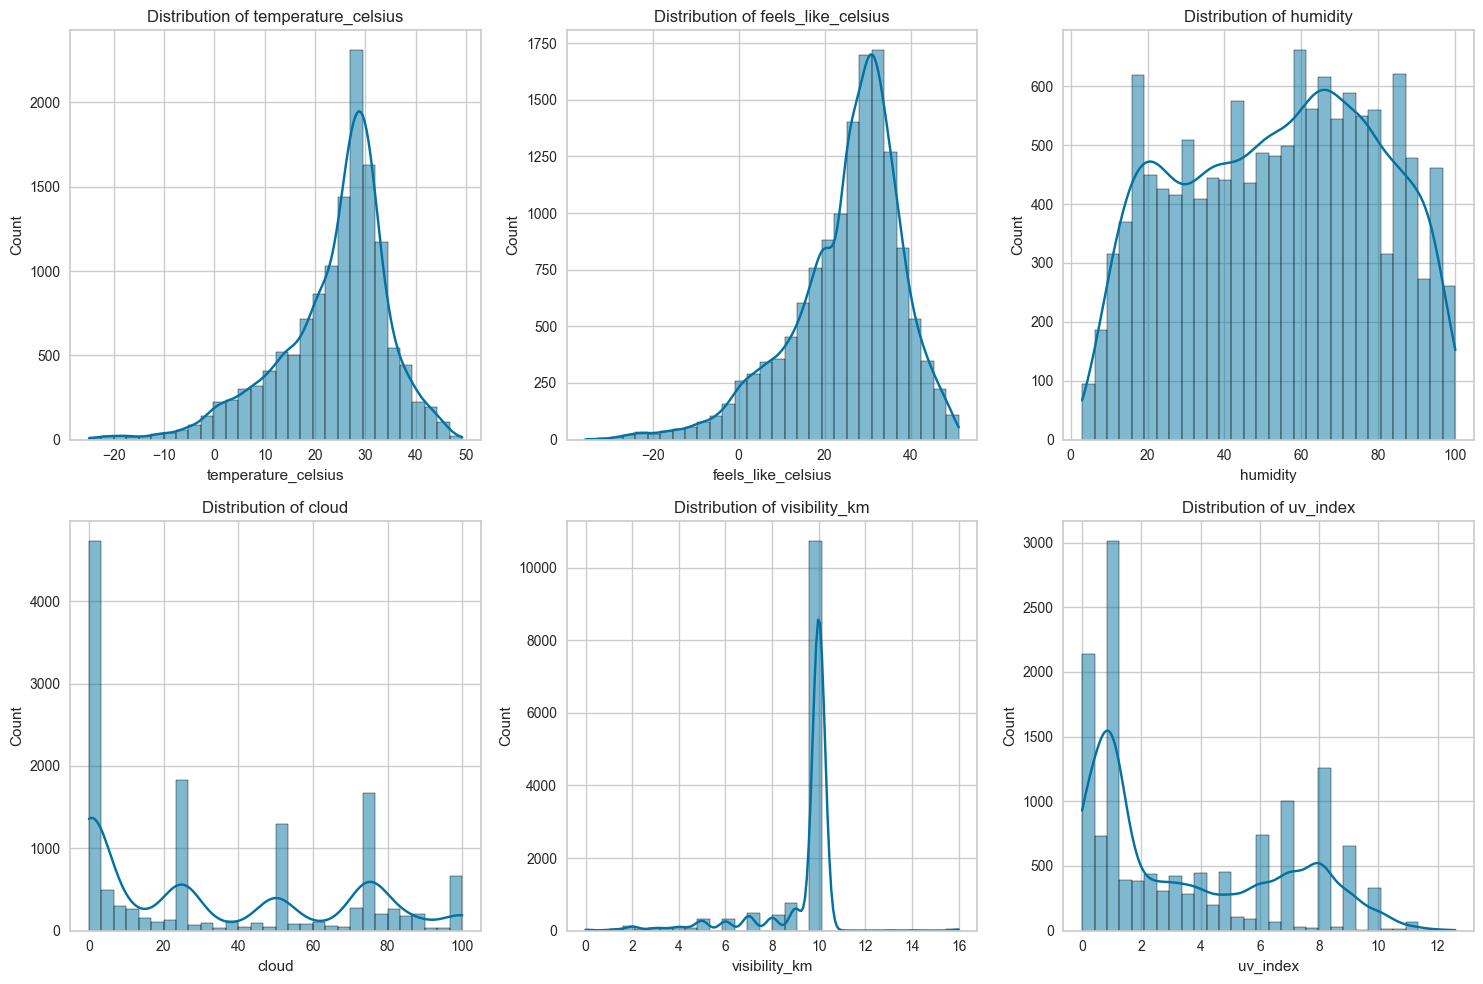

In [13]:
suhu_cuaca = ['temperature_celsius', 'feels_like_celsius', 'humidity', 'cloud', 'visibility_km', 'uv_index']

plt.figure(figsize=(15,10))

for i, column in enumerate(suhu_cuaca, 1):
  plt.subplot(2,3,i)
  sns.histplot(df_asia[column], kde=True, bins=30)
  plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

**Distribusi angin dan TEkanan Udara**

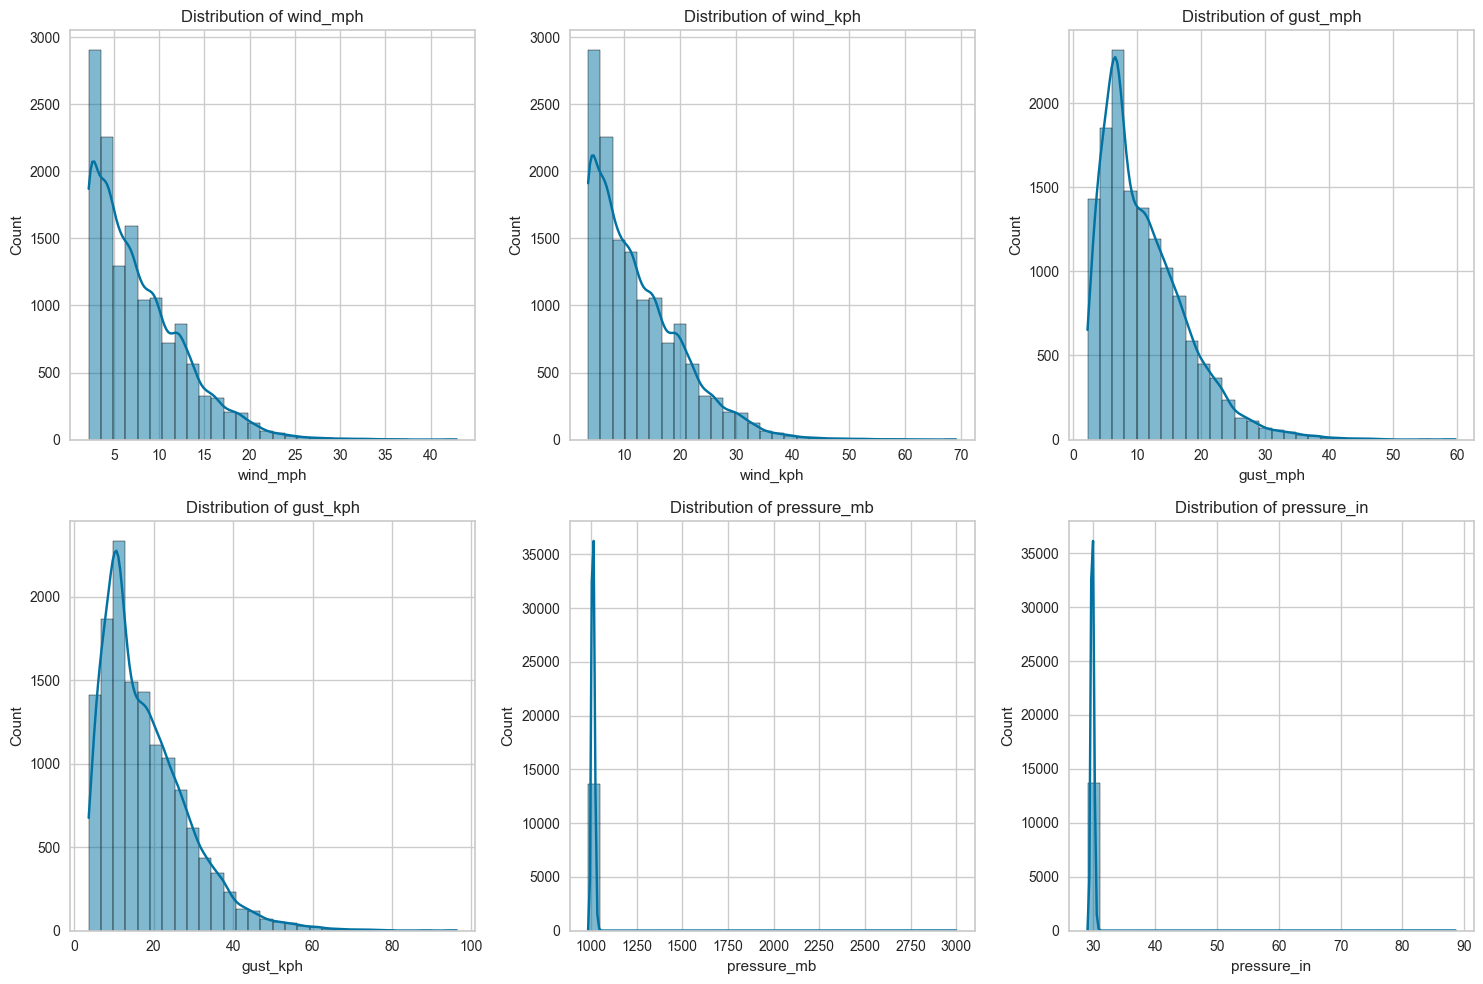

In [14]:
angin_udara = ['wind_mph', 'wind_kph', 'gust_mph', 'gust_kph', 'pressure_mb', 'pressure_in']

plt.figure(figsize=(15,10))

for i, column in enumerate(angin_udara, 1):
  plt.subplot(2,3,i)
  sns.histplot(df_asia[column], kde=True, bins=30)
  plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

**business question 1** <br>
1 Bagaimana tren suhu rata-rata bulanan di Asia?

In [15]:
monthly_trend = df_asia.resample(rule='M', on='last_updated').agg({
    'temperature_celsius' : 'mean'
}).reset_index()

monthly_trend.index = monthly_trend['last_updated'].dt.strftime('%B')
monthly_trend.drop(columns=['last_updated'], inplace=True)
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

monthly_trend.index = pd.Categorical(monthly_trend.index, categories=month_order, ordered=True)
monthly_trend = monthly_trend.sort_index()
monthly_trend

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_25684\2785597916.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = df_asia.resample(rule='M', on='last_updated').agg({


,temperature_celsius
January,15.801614
February,16.310817
May,26.660100
June,30.003696
July,30.748759
August,30.356452
September,28.793329
October,25.050437
November,20.860042
December,15.926949


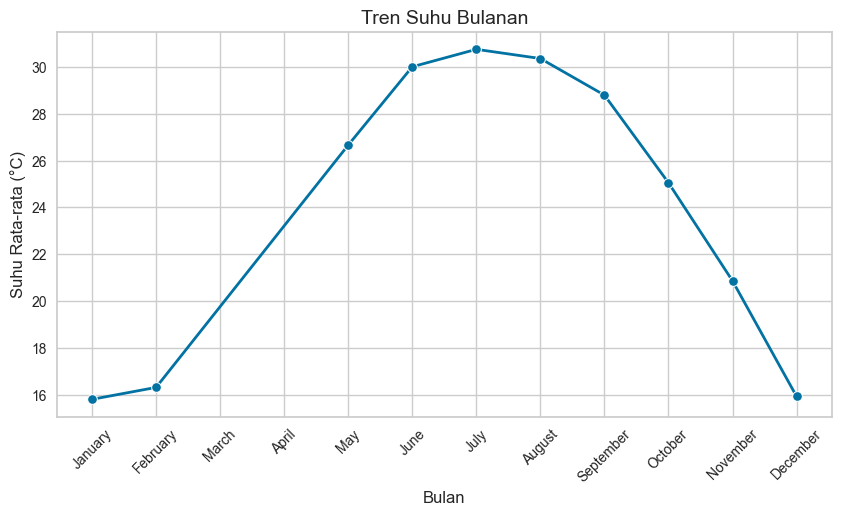

In [16]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_trend.index, y=monthly_trend['temperature_celsius'], marker='o', linewidth=2, color='b')

plt.title('Tren Suhu Bulanan', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Suhu Rata-rata (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**business question 2** <br>
2. Negara mana yang memiliki kualitas udara terburuk?

In [17]:
air_quality = df.groupby('country')['air_quality_us-epa-index'].mean().sort_values(ascending=False).reset_index()
air_quality.head(10)

,country,air_quality_us-epa-index
0,China,4.154386
1,Chile,4.081272
2,Südkorea,4.000000
3,India,3.760563
4,Saudi Arabia,3.422535
5,Kuwait,3.370629
6,Malaysia,3.174825
7,Bahrain,3.174825
8,Bangladesh,3.066667
9,Pakistan,3.056140


C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_25684\3800475035.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_air_quality["air_quality_us-epa-index"],


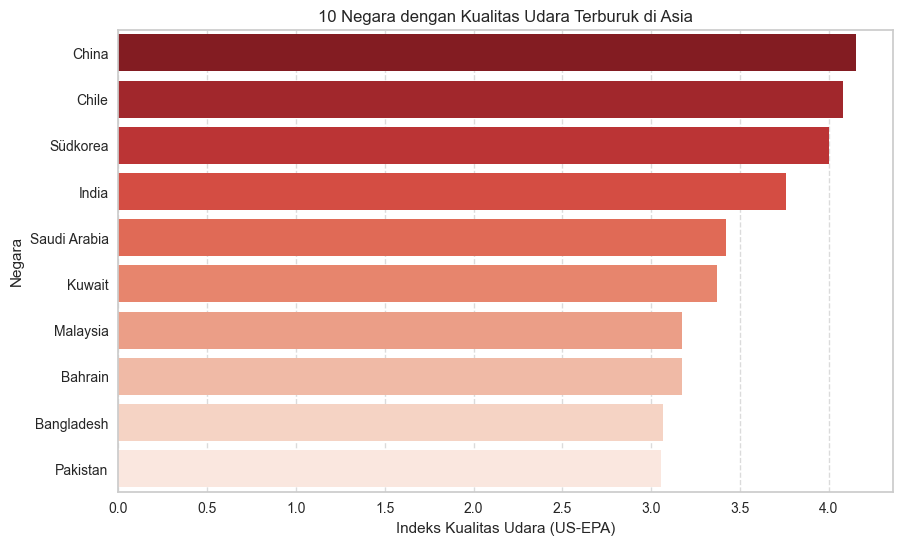

In [18]:
plt.figure(figsize=(10, 6))

top_10_air_quality = air_quality.head(10)

sns.barplot(x=top_10_air_quality["air_quality_us-epa-index"], 
            y=top_10_air_quality["country"], 
            palette="Reds_r")

plt.xlabel("Indeks Kualitas Udara (US-EPA)")
plt.ylabel("Negara")
plt.title("10 Negara dengan Kualitas Udara Terburuk di Asia")
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

**business question 3** <br>
3 Negara mana yang memiliki rata rata kecepatan angin trbesar?

In [21]:
wind_speed = df_asia.groupby('country')['wind_kph'].mean().sort_values(ascending=False).reset_index()
wind_speed.head(10)

,country,wind_kph
0,Azerbaijan,23.096842
1,Bahrain,19.946503
2,Qatar,18.692982
3,Kazakhstan,17.942456
4,Jordan,17.905245
5,United Arab Emirates,17.726224
6,Israel,17.104912
7,Iraq,16.889860
8,Japan,16.496853
9,Sri Lanka,16.448772


C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_25684\528854121.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=wind_speed.head(10), x="wind_kph", y="country", palette="Blues_r"  )


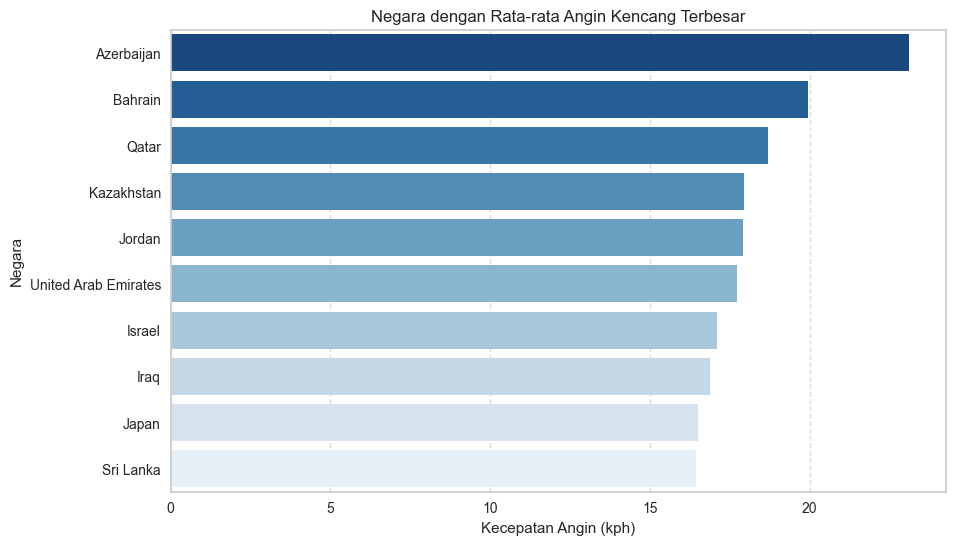

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=wind_speed.head(10), x="wind_kph", y="country", palette="Blues_r"  )

plt.xlabel("Kecepatan Angin (kph)")
plt.ylabel("Negara")
plt.title("Negara dengan Rata-rata Angin Kencang Terbesar")
plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.show()


**Business question 4** <br>
4.Negara mana yang memiliki curah hujan tertinggi?

In [25]:
rainfall = df.groupby('country')['precip_mm'].mean().sort_values(ascending=False).reset_index()
rainfall.head(10)

,country,precip_mm
0,Lao People's Democratic Republic,1.970000
1,Letonia,1.830000
2,Malásia,1.550000
3,Brunei Darussalam,0.580281
4,Malaysia,0.580070
5,USA United States of America,0.530000
6,Sierra Leone,0.521338
7,Sri Lanka,0.508105
8,Guyana,0.470318
9,Indonesia,0.468115


C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_25684\1742842424.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rainfall.head(10), x="precip_mm",  y="country", palette="coolwarm")


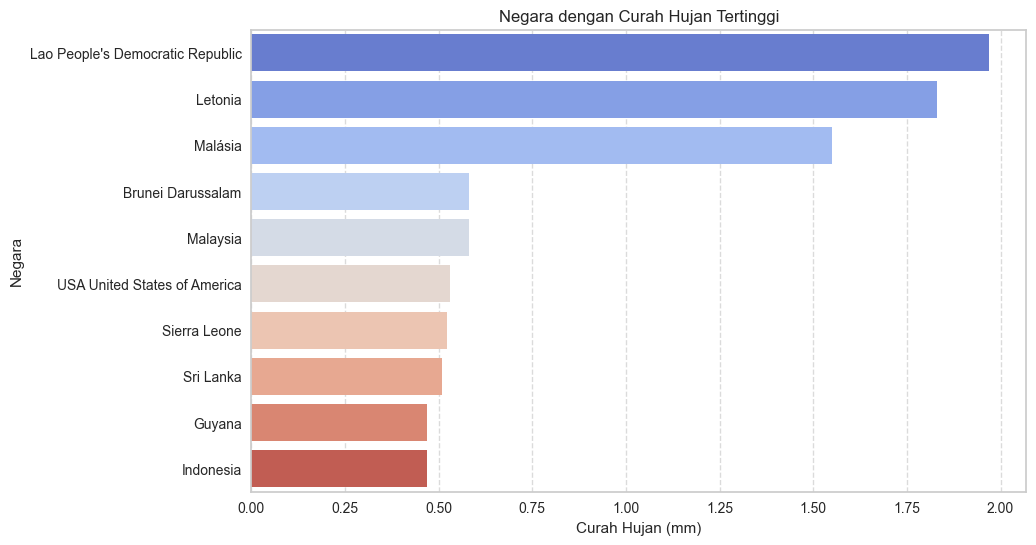

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(data=rainfall.head(10), x="precip_mm",  y="country", palette="coolwarm")
plt.xlabel("Curah Hujan (mm)")
plt.ylabel("Negara")
plt.title("Negara dengan Curah Hujan Tertinggi")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Business question 7**<br>
7. Bagaimana pengaruh fase bulan terhadap suhu rata-rata?

In [27]:
df.groupby('moon_phase')['temperature_celsius'].mean().reset_index()

,moon_phase,temperature_celsius
0,First Quarter,21.991453
1,Full Moon,21.956269
2,Last Quarter,22.045697
3,New Moon,22.645253
4,Waning Crescent,22.129017
5,Waning Gibbous,21.902251
6,Waxing Crescent,22.832917
7,Waxing Gibbous,22.743798


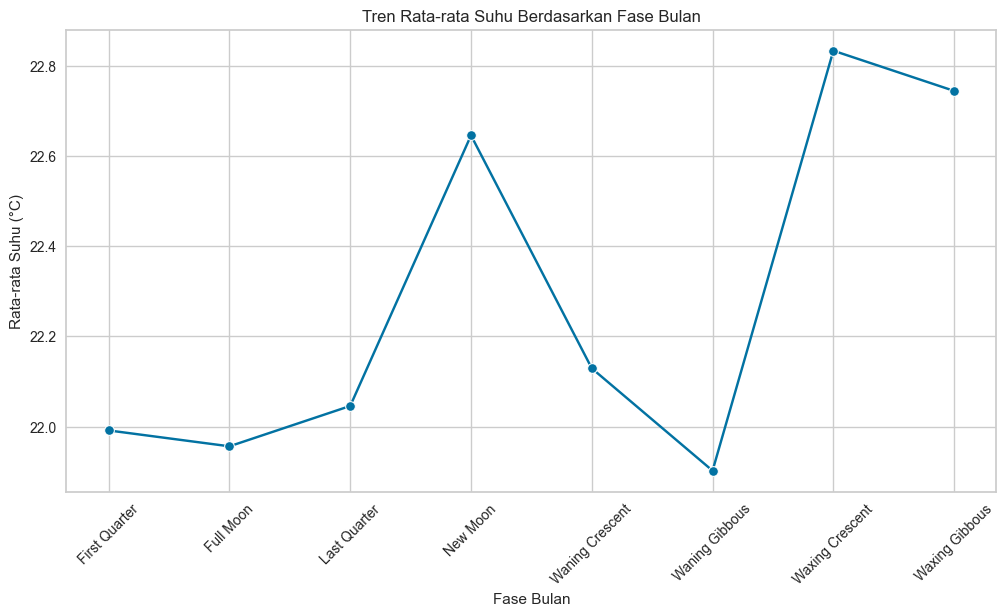

In [28]:
plt.figure(figsize=(12, 6))
avg_temp_per_moon_phase = df.groupby('moon_phase')['temperature_celsius'].mean().reset_index()
sns.lineplot(x='moon_phase', y='temperature_celsius', data=avg_temp_per_moon_phase, marker='o', linestyle='-')
plt.xlabel("Fase Bulan")
plt.ylabel("Rata-rata Suhu (°C)")
plt.title("Tren Rata-rata Suhu Berdasarkan Fase Bulan")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Business Question**<br>
8. Bagaimana Proporsi Fase Bulan yang Terjadi di Asia?

In [29]:
moon_phase_counts = df_asia['moon_phase'].value_counts()

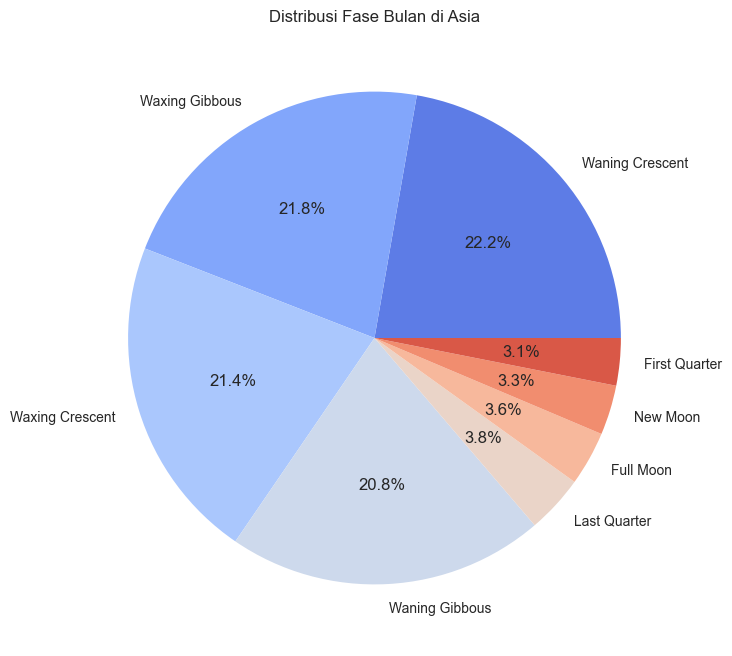

In [30]:
plt.figure(figsize=(8, 8))

moon_phase_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("coolwarm", len(moon_phase_counts)))
plt.ylabel(None)  
plt.title("Distribusi Fase Bulan di Asia")
plt.show()


**Bisnis Question 9**<br>
9. Bagaimana Rata rata Konsentrasi Setiap Polutan

In [ ]:
pollutant_means = df[[
    "air_quality_Carbon_Monoxide", "air_quality_Ozone", "air_quality_Sulphur_dioxide",
    "air_quality_Nitrogen_dioxide", "air_quality_PM2.5", "air_quality_PM10"
]].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=pollutant_means.values, y=pollutant_means.index, palette="Reds_r")
plt.xlabel("Konsentrasi Rata-rata (µg/m³ atau ppm)")
plt.ylabel("Polutan")
plt.title("Rata-rata Konsentrasi Setiap Polutan di Dataset")
plt.show()

**Bisnis question 10** <br>
10. Bagaimana Tren Rata rata Konsentrasi Polutan per Bulan

In [ ]:
df["last_updated"] = pd.to_datetime(df["last_updated"])
monthly_pollutants = df.set_index('last_updated').resample('M')[[
    "air_quality_Carbon_Monoxide", "air_quality_Ozone", "air_quality_Sulphur_dioxide",
    "air_quality_Nitrogen_dioxide", "air_quality_PM2.5", "air_quality_PM10"
]].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_pollutants, dashes=False)
plt.title('Tren Rata-rata Konsentrasi Polutan Per Bulan')
plt.xlabel('Tahun-Bulan')
plt.ylabel('Konsentrasi (µg/m³ atau ppm)')
plt.xticks(rotation=45)
plt.legend(title='Polutan', labels=[
    "Karbon Monoksida", "Ozon", "Dioxygen Sulfur", "Dioxygen Nitrogen",
    "PM2.5", "PM10"
])
plt.tight_layout()
plt.show()

## **Preprocessing** ##

### Outlier 

### Feature Selection

### Feature Engineering ### 

## **Modelling** ##

### K-Means ### 

### DBSCAN ### 

### Agglomerative ### 